In [1]:
import tensorflow as tf

In [2]:
from tensorflow.keras.layers import Input, SimpleRNN, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

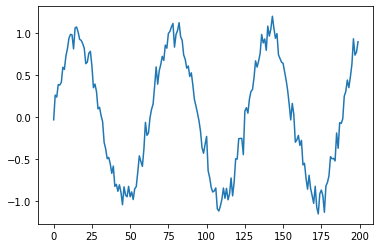

In [5]:
series = np.sin(0.1 * np.arange(200)) + np.random.randn(200) * 0.1

plt.plot(series)
plt.show()

In [6]:
# Building The Dataset
T = 10
X = []
Y = []

for t in range(len(series) - T):
  x = series[t:t+T]
  X.append(x)
  y = series[t + T]
  Y.append(y)
X = np.array(X).reshape(-1, T, 1) # making the data a N x T x D array
Y = np.array(Y)
N = len(X)
print("X.shape", X.shape, "Y.shape", Y.shape)

X.shape (190, 10, 1) Y.shape (190,)


In [22]:
i = Input(shape=(T,1))
x = SimpleRNN(5)(i) #the default activation is Tanh, thus we dont need to include it here
x = Dense(1)(x)
model = Model(i,x)
model.compile(loss = 'mse', optimizer = Adam(lr =0.1))

r = model.fit(
    X[:-N//2], Y[:-N//2],
    epochs  = 80,
    validation_data = (X[-N//2:], Y[-N//2:])
)

Epoch 1/80


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


3/3 [==============================] - 1s 113ms/step - loss: 0.1069 - val_loss: 0.0576
Epoch 2/80
3/3 [==============================] - 0s 20ms/step - loss: 0.0626 - val_loss: 0.0615
Epoch 3/80
3/3 [==============================] - 0s 19ms/step - loss: 0.0317 - val_loss: 0.0364
Epoch 4/80
3/3 [==============================] - 0s 25ms/step - loss: 0.0320 - val_loss: 0.0352
Epoch 5/80
3/3 [==============================] - 0s 24ms/step - loss: 0.0270 - val_loss: 0.0333
Epoch 6/80
3/3 [==============================] - 0s 26ms/step - loss: 0.0250 - val_loss: 0.0375
Epoch 7/80
3/3 [==============================] - 0s 16ms/step - loss: 0.0242 - val_loss: 0.0247
Epoch 8/80
3/3 [==============================] - 0s 26ms/step - loss: 0.0192 - val_loss: 0.0271
Epoch 9/80
3/3 [==============================] - 0s 16ms/step - loss: 0.0178 - val_loss: 0.0219
Epoch 10/80
3/3 [==============================] - 0s 25ms/step - loss: 0.0180 - val_loss: 0.0232
Epoch 11/80
3/3 [======================

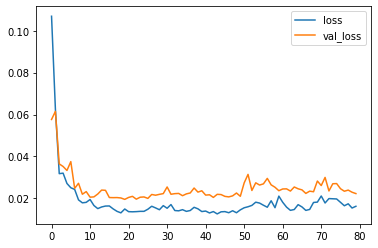

In [23]:
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')

plt.legend()

In [24]:
#Wrong forecast using true Predictions
validation_target  = Y[-N//2:]
validation_predictions = []

i = -N//2

while len(validation_predictions) < len (validation_target):
  p = model.predict(X[i].reshape(1, -1, 1))[0,0]
  i += 1
  validation_predictions.append(p)

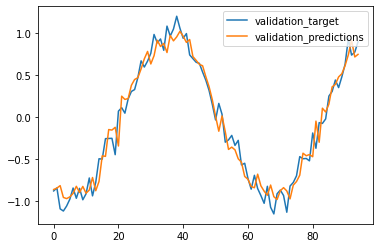

In [25]:
plt.plot(validation_target, label = 'validation_target')
plt.plot(validation_predictions, label = 'validation_predictions')
plt.legend()

In [26]:
#Forecast of future values

validation_target = Y[-N//2:]
validation_predictions = []

last_x = X[-N//2] #last train input (1-D array of length T)

while len(validation_predictions) < len (validation_target):
  p = model.predict(last_x.reshape(1, -1, 1))[0,0]  #1x1 array converted into a scalar

  validation_predictions.append(p) #update the predictions list everytime it goes through the while loop

  last_x = np.roll(last_x, -1) #shift the last train input by one steo to the left 
  last_x [-1] = p # then make the lastest prediction the new input which will be at the right

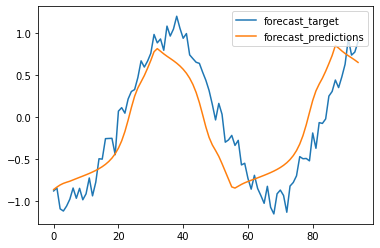

In [27]:
plt.plot(validation_target, label = 'forecast_target')
plt.plot(validation_predictions, label = 'forecast_predictions')
plt.legend()